### Завдання 1 ### 


In [2]:
import pandas as pd

data_2d = pd.read_csv('data_2d.csv')
print(data_2d.head())

mnist = pd.read_csv('mnist.csv')
print(mnist.head())


   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  
   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661

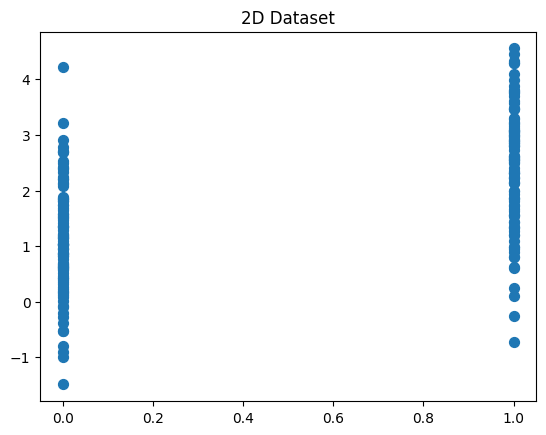

In [3]:
import matplotlib.pyplot as plt

plt.scatter(data_2d.iloc[:,0], data_2d.iloc[:,1], s=50)
plt.title("2D Dataset")
plt.show()


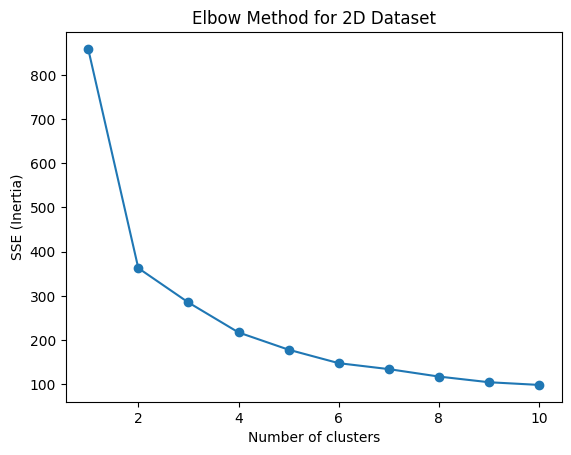

In [4]:
from sklearn.cluster import KMeans
import numpy as np

# Обчислюємо суму квадратів відстаней до центроїдів для різної кількості кластерів
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_2d)
    sse.append(kmeans.inertia_)

# Графік ліктя
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for 2D Dataset')
plt.show()


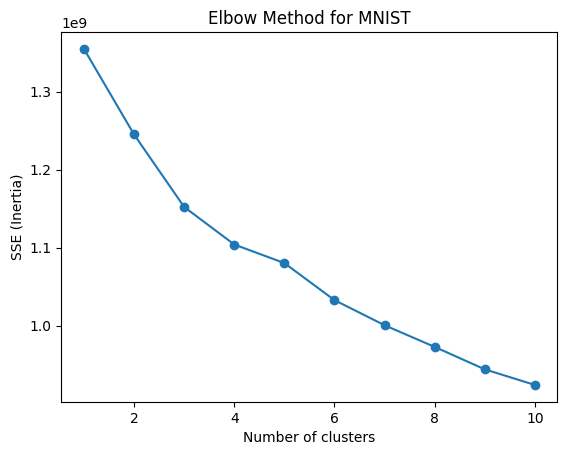

In [6]:
from sklearn.decomposition import PCA

mnist_df = pd.DataFrame(mnist)
mnist_sample = mnist_df.sample(n=min(1000, len(mnist_df)), random_state=42)

pca = PCA(n_components=50)
mnist_pca = pca.fit_transform(mnist_sample)

# Ліктевий метод для MNIST
sse_mnist = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mnist_pca)
    sse_mnist.append(kmeans.inertia_)

plt.plot(k_range, sse_mnist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for MNIST')
plt.show()


### Завдання 2 ### 


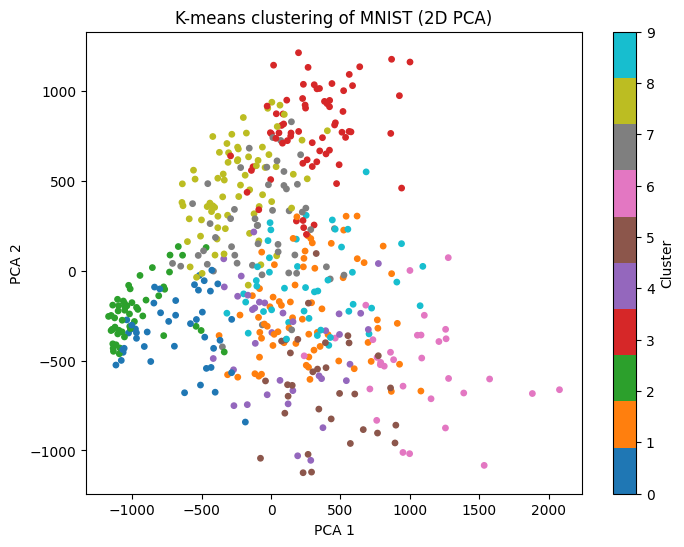

In [7]:
# Припустимо, ти вибрав оптимальну кількість кластерів за ліктевим методом
k_opt = 10  

# Застосовуємо K-means для отриманих кластерів
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(mnist_pca)  # використовуючи PCA на 50 компонент

# PCA для зменшення розмірності до 2D для візуалізації
pca_2 = PCA(n_components=2)
mnist_pca_2 = pca_2.fit_transform(mnist_sample)

# Візуалізація кластерів
plt.figure(figsize=(8,6))
plt.scatter(mnist_pca_2[:,0], mnist_pca_2[:,1], c=clusters, cmap='tab10', s=15)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means clustering of MNIST (2D PCA)')
plt.colorbar(label='Cluster')
plt.show()

Після виконання кластеризації MNIST можна зробити такі висновки:

Кількість кластерів
Графік ліктевого методу показав, що оптимально вибрати близько 10 кластерів. Це логічно, адже в датасеті MNIST 10 цифр від 0 до 9.

Як виглядають кластери у 2D
На графіку видно, що точки одного кластеру групуються разом, але межі між кластерами не завжди чіткі. Це нормально, бо при зменшенні розмірності через PCA деякі відмінності між цифрами “згладжуються”.

Що показує K-means
Алгоритм добре виділяє цифри, які сильно відрізняються за формою (наприклад, 0 або 1). А ось схожі цифри (наприклад, 3 і 5) іноді потрапляють у сусідні кластери.

Висновок про PCA
PCA допомагає прискорити кластеризацію і зробити дані зручними для візуалізації. Але для точного розділення цифр варто працювати з більшою кількістю компонент, як ми робили для K-means (50 компонент).
